In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df  = pd.read_csv('cars.csv',na_values=['None','nan'])

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(3)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,NaN,man,5.0,7.0,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,NaN,man,5.0,5.0,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06


In [4]:
df.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               3016807
transmission            741630
door_count             1090066
seat_count             1287099
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

#### Find missing percent in dataframe  column

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
color_slug,color_slug,94.103400
stk_year,stk_year,84.910828
fuel_type,fuel_type,52.002583
seat_count,seat_count,36.226594
model,model,31.899495
body_type,body_type,31.605455
door_count,door_count,30.680918
engine_displacement,engine_displacement,20.924076
transmission,transmission,20.873863
engine_power,engine_power,15.617527


Remove some columns from avobe percentage of missing values(>30%). Remove dates.

In [6]:
df.drop(['model', 'fuel_type','date_created','date_last_seen','manufacture_year','stk_year','body_type', 'color_slug'], axis=1, inplace=True)

In [7]:
df.head()

,maker,mileage,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur
0,ford,151000.0,2000.0,103.0,man,5.0,7.0,10584.75
1,skoda,143476.0,2000.0,81.0,man,5.0,5.0,8882.31
2,bmw,97676.0,1995.0,85.0,man,5.0,5.0,12065.06
3,skoda,111970.0,1200.0,47.0,man,5.0,5.0,2960.77
4,skoda,128886.0,1200.0,47.0,man,5.0,5.0,2738.71


show table

In [8]:
df.head(2)

,maker,mileage,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur
0,ford,151000.0,2000.0,103.0,man,5.0,7.0,10584.75
1,skoda,143476.0,2000.0,81.0,man,5.0,5.0,8882.31


Describe the table to know what to impute in continous variable data.

In [9]:
df.describe()

,mileage,engine_displacement,engine_power,door_count,seat_count,price_eur
count,3.190328e+06,2.809498e+06,2.998035e+06,2.462846e+06,2.265813e+06,3.552912e+06
mean,1.158140e+05,2.043958e+03,9.846796e+01,4.052180e+00,4.869694e+00,1.625812e+06
std,3.422508e+05,1.973958e+03,4.907309e+01,9.911850e-01,1.212611e+00,2.025622e+09
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e-02
25%,1.880000e+04,1.400000e+03,6.800000e+01,4.000000e+00,5.000000e+00,1.295340e+03
50%,8.641500e+04,1.798000e+03,8.600000e+01,4.000000e+00,5.000000e+00,7.364910e+03
75%,1.580250e+05,1.997000e+03,1.100000e+02,5.000000e+00,5.000000e+00,1.628423e+04
max,9.999999e+06,3.276700e+04,2.237000e+03,7.700000e+01,5.170000e+02,2.706149e+12


###### If mean> median impute median because data contains extreme values.

### Fill nan values of `mileage` , `engine_displacement` and `engine_power` column.

In [10]:
df['mileage'].fillna((df['mileage'].median()), inplace=True)
df['engine_displacement'].fillna((df['engine_displacement'].median()), inplace=True)
df['engine_power'].fillna((df['engine_power'].median()), inplace=True)

In [11]:
df.isnull().sum()

maker                   518915
mileage                      0
engine_displacement          0
engine_power                 0
transmission            741630
door_count             1090066
seat_count             1287099
price_eur                    0
dtype: int64

In [12]:
df.corr()

,mileage,engine_displacement,engine_power,door_count,seat_count,price_eur
mileage,1.000000,0.077486,-0.008825,0.022303,0.022289,-0.000162
engine_displacement,0.077486,1.000000,0.256916,-0.049912,-0.030047,0.002721
engine_power,-0.008825,0.256916,1.000000,-0.065297,-0.035215,-0.000178
door_count,0.022303,-0.049912,-0.065297,1.000000,0.304062,-0.003450
seat_count,0.022289,-0.030047,-0.035215,0.304062,1.000000,-0.001692
price_eur,-0.000162,0.002721,-0.000178,-0.003450,-0.001692,1.000000


##### Histogramplot to see distribution of data(continuous)

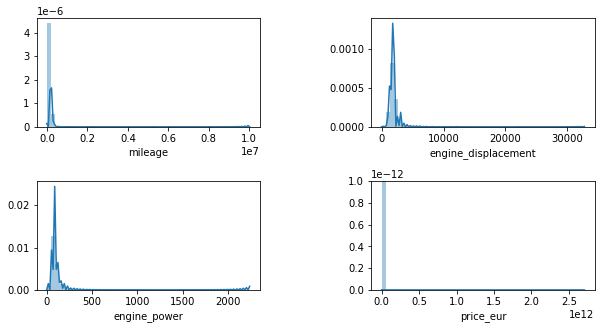

In [13]:
f, axes = plt.subplots(2, 2 , figsize=(10,5))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
sns.distplot(df['mileage'],ax=axes[0][0])
sns.distplot(df['engine_displacement'], ax=axes[0][1])
sns.distplot(df['engine_power'],ax=axes[1][0])
sns.distplot(df['price_eur'],ax=axes[1][1])

Right skewed data.

# Two way table

Let's check relationship between two object type data variables.

###### Relationship between maker type and transmission type

In [14]:
mak_tra = pd.crosstab(index=df['maker'],columns=df['transmission'],dropna=True) 

In [15]:
mak_tra.head()

transmission,auto,man
maker,,
alfa-romeo,292,2337
aston-martin,8,1
audi,103239,108744
bentley,966,25
bmw,119060,103998


Fill auto type in nan values of given list of makers (fill_auto_given_maker)

In [16]:
mak_tra.loc[mak_tra['auto'] >= mak_tra['man'] ].head(3) 

transmission,auto,man
maker,,
aston-martin,8,1
bentley,966,25
bmw,119060,103998


Given a makertype bentley 966 cars are auto and 25 cars are mannual. You can clearly see most of the cars if manufactured by bentley are automatic. You can use it to fill nan values instead of filling using mode value.

__This will be implemented later.__

In this notebook I will fill nan values using mode value. This is just for a knowledge purpose

In [17]:
fill_auto_given_maker = list(mak_tra.loc[mak_tra['auto'] >= mak_tra['man'] ].index)
fill_man_given_maker = list(mak_tra.loc[mak_tra['auto'] < mak_tra['man'] ].index)

__Below are the makertype that has most of it's cars type/transmisson auto__

In [18]:
fill_auto_given_maker[:8]

['aston-martin',
 'bentley',
 'bmw',
 'chrysler',
 'dodge',
 'hummer',
 'infinity',
 'jaguar']

__Below are the makertype that has most of it's cars type/transmisson man__

In [19]:
fill_man_given_maker[:8]

['alfa-romeo',
 'audi',
 'chevrolet',
 'citroen',
 'dacia',
 'fiat',
 'ford',
 'honda']

lets see dataset description on object type column.

In [20]:
df.describe(include="O")

,maker,transmission
count,3033997,2811282
unique,46,2
top,skoda,man
freq,313830,2021990


__In the above table transmission type has two unique value, `man` being most frequent.As I have already mentioned lets fill `nan` values of object type column using mode.__

In [21]:
df.isnull().sum()

maker                   518915
mileage                      0
engine_displacement          0
engine_power                 0
transmission            741630
door_count             1090066
seat_count             1287099
price_eur                    0
dtype: int64

#### Impute most repeated value in maker, transmission, door_count, and seat_count variable

In [22]:
df['maker'].fillna(df['maker'].mode()[0], inplace=True) 
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True) 

In [23]:
df['door_count'].fillna(df['door_count'].mode()[0], inplace=True) 
df['seat_count'].fillna(df['seat_count'].mode()[0], inplace=True) 

In [24]:
df.isnull().sum()

maker                  0
mileage                0
engine_displacement    0
engine_power           0
transmission           0
door_count             0
seat_count             0
price_eur              0
dtype: int64

Let's do pairplot to see relationship between data variables.

###### Barplot to see categorical type dataset.

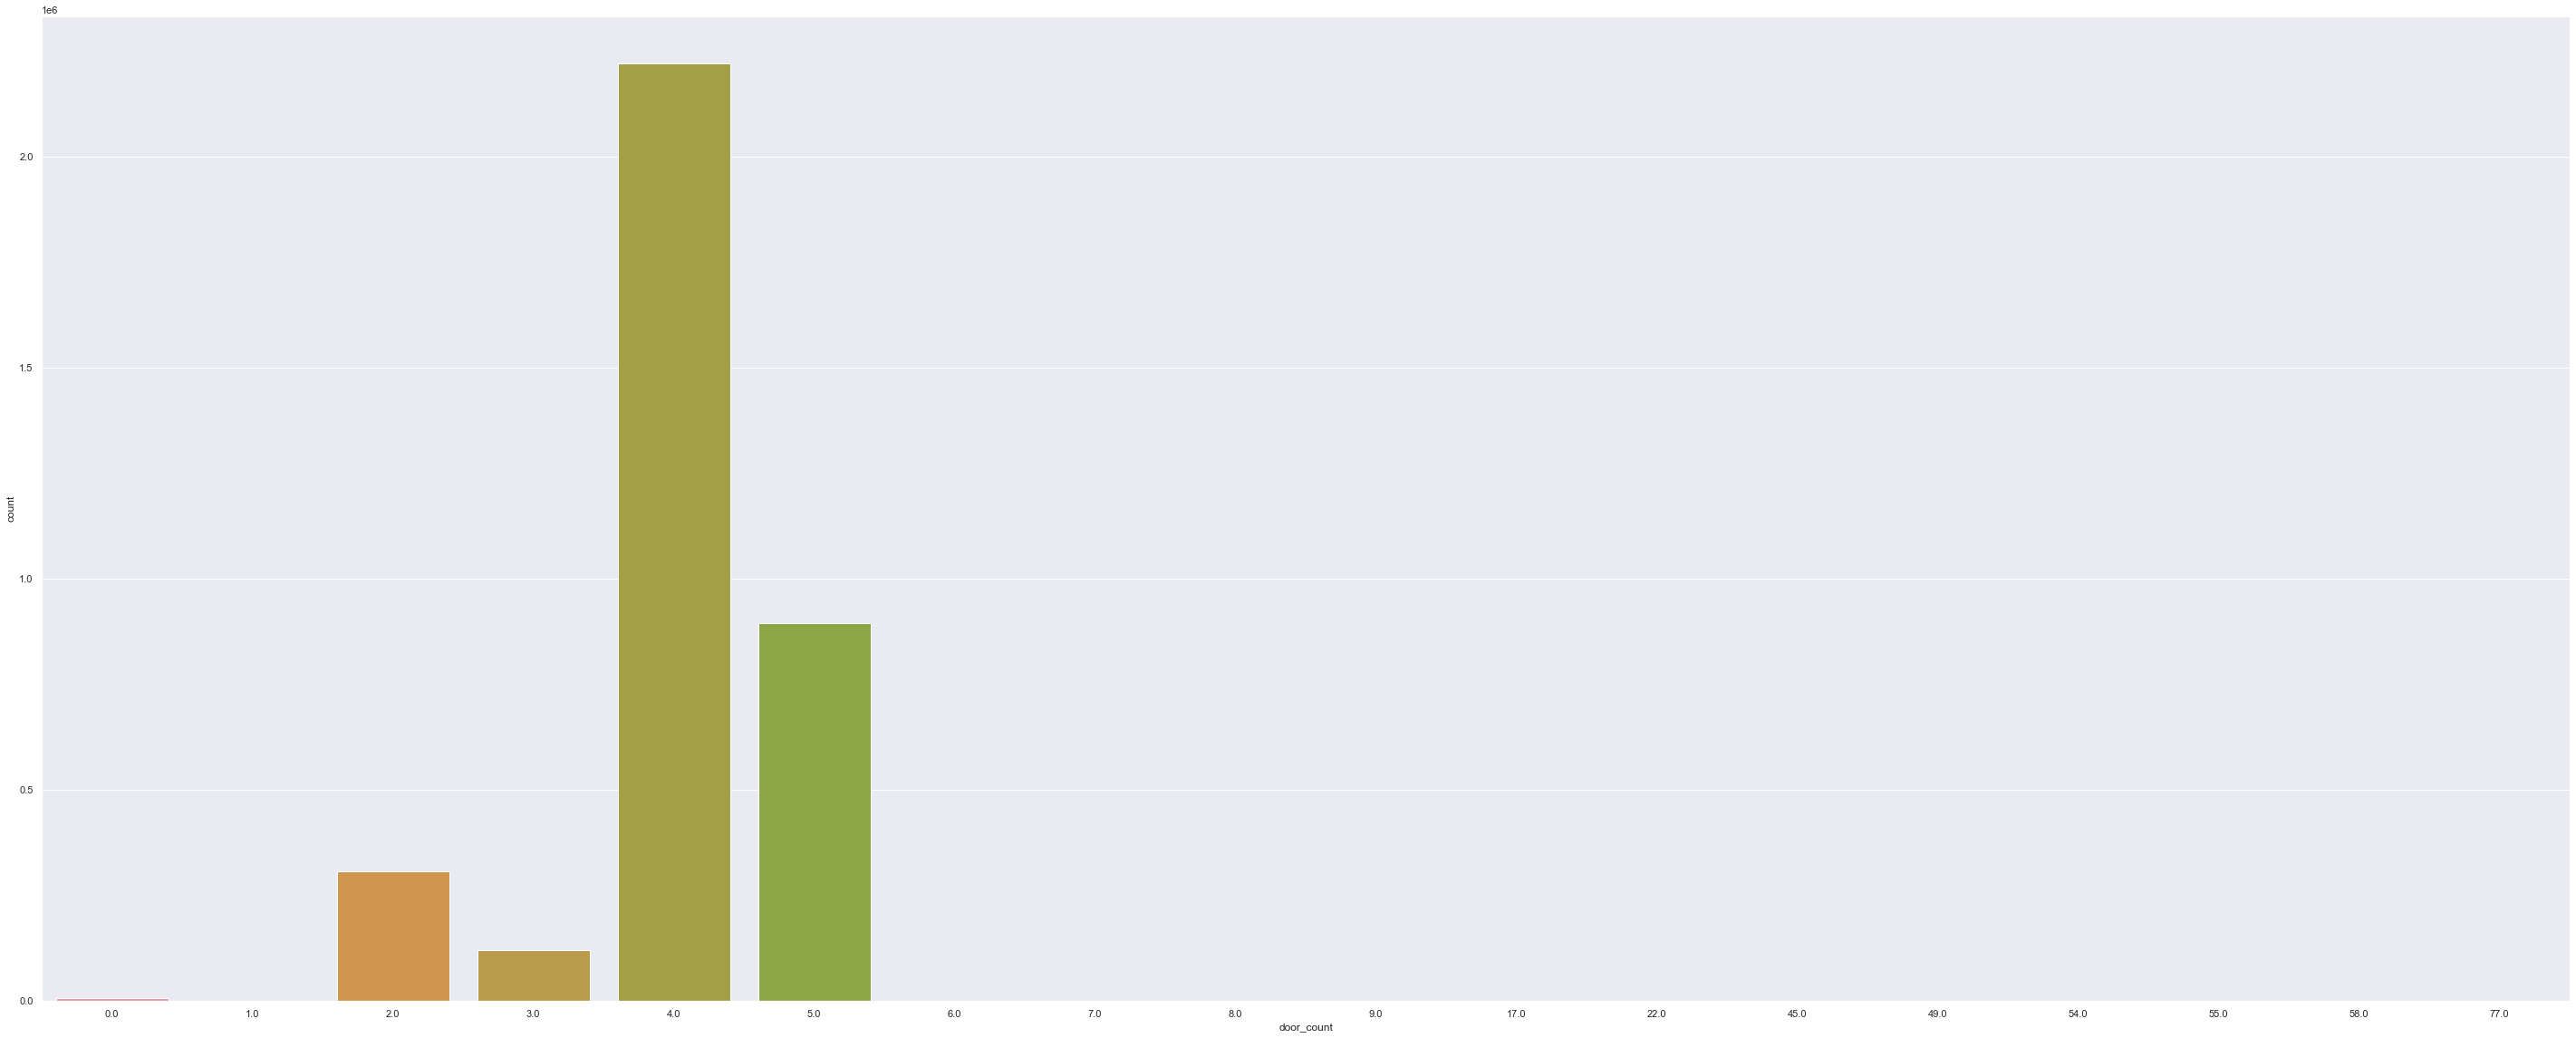

In [25]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = 'door_count', data = df)

In [26]:
df.door_count.unique()

array([ 5.,  3.,  4.,  2.,  6.,  1.,  7.,  9.,  8., 77., 58., 54.,  0.,
       55., 22., 45., 17., 49.])

###### This is interesting a car with 77 doors . And another interesting value is 0. 0 doors??

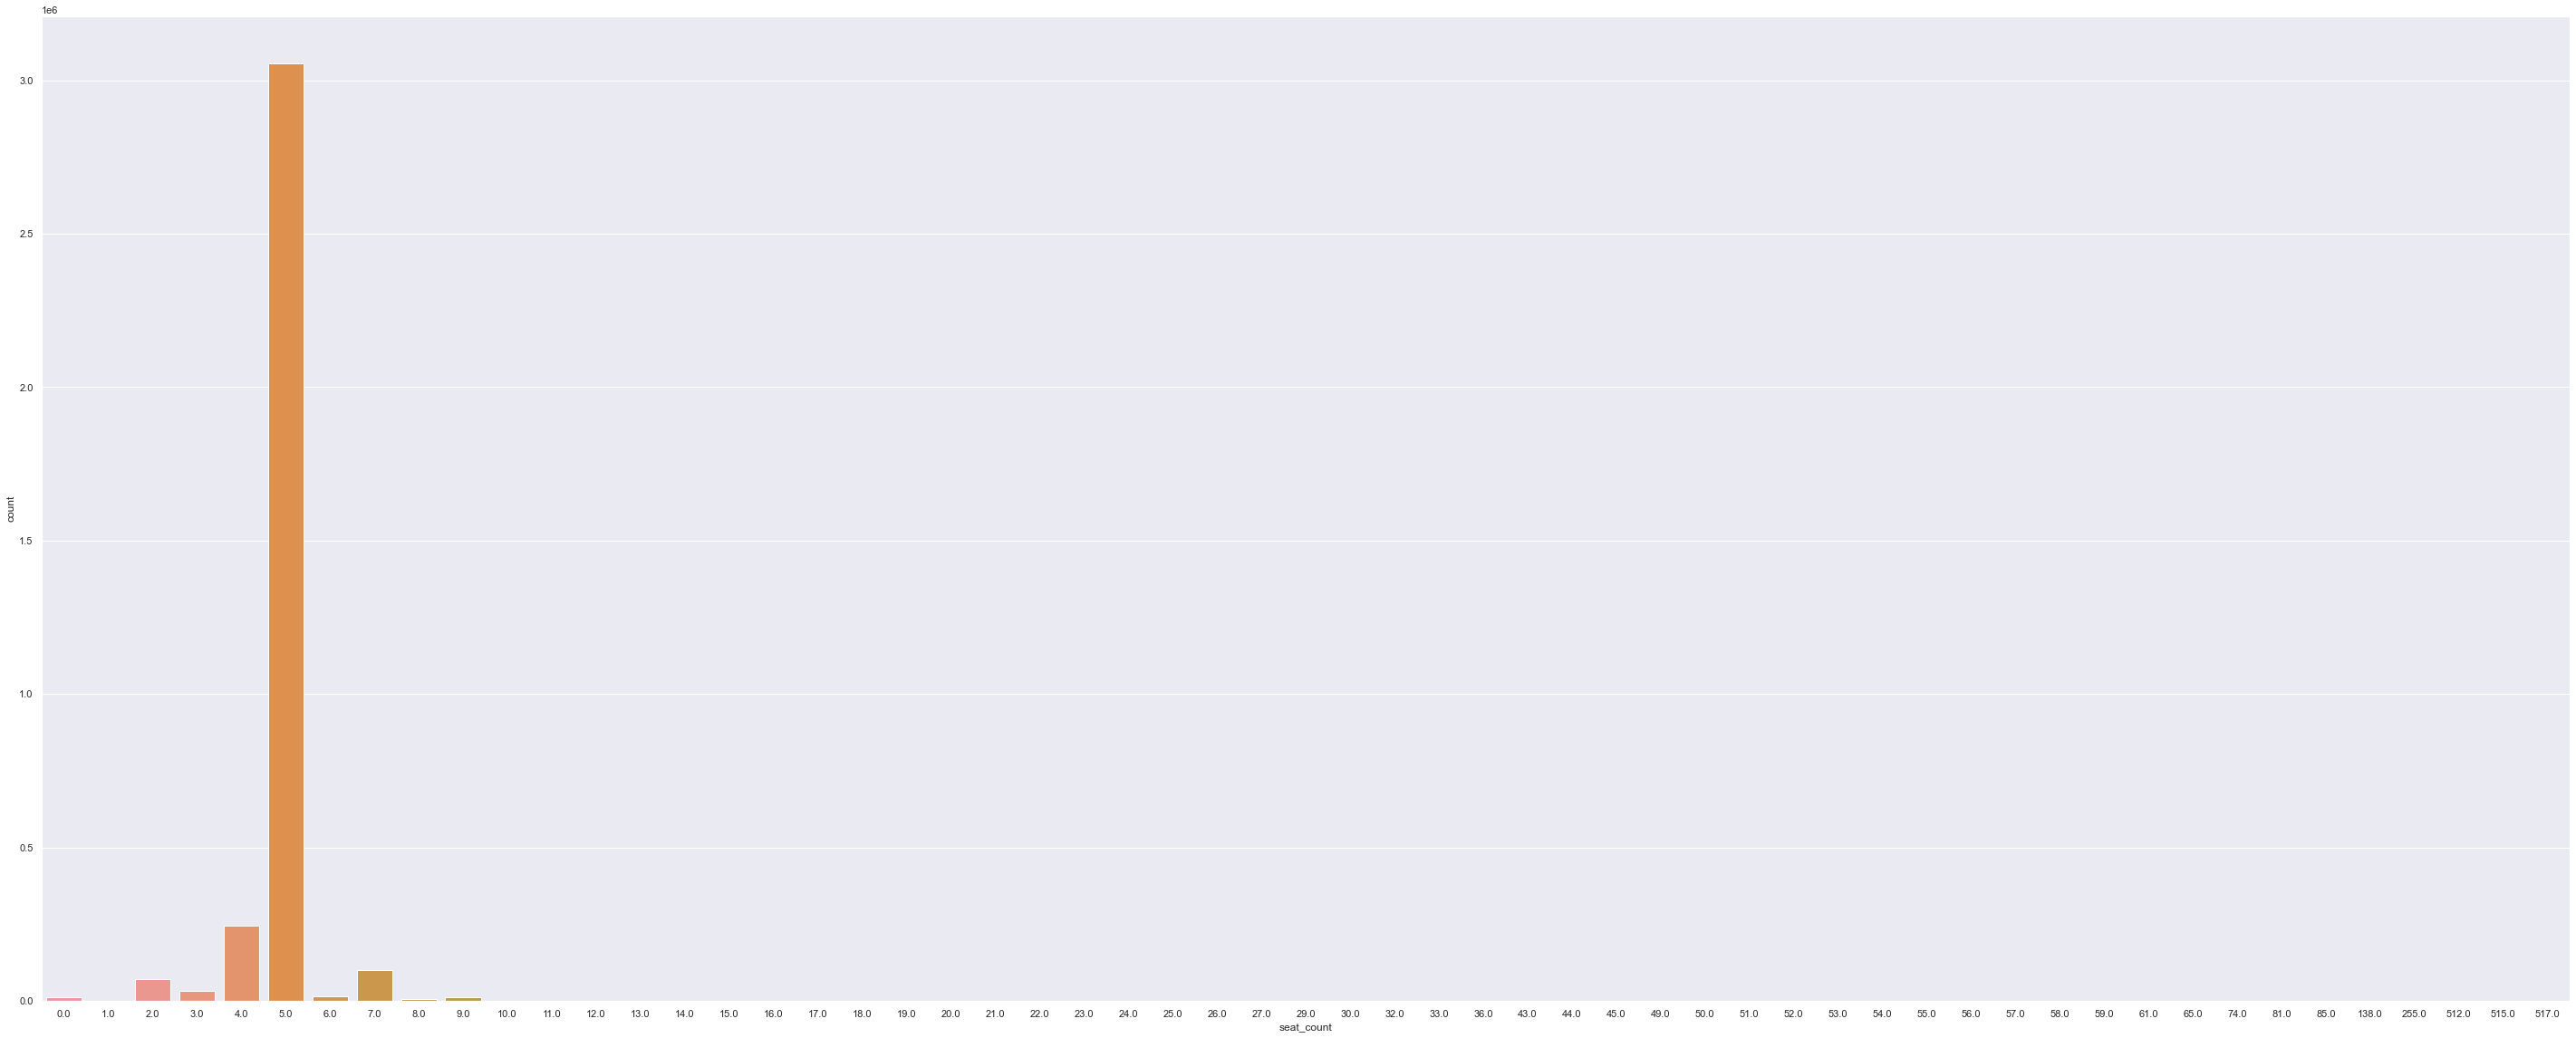

In [27]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = 'seat_count', data = df)

In [28]:
df.seat_count.unique()

array([  7.,   5.,   4.,   6.,   9.,   8.,   2.,   3.,   1.,  18.,  20.,
        10.,  11.,  15.,  12.,  16.,  14.,  50.,  17.,  74.,  65.,  19.,
        54.,  13.,  27.,  45.,  24.,  56.,  22., 255.,  23.,  57.,  25.,
        51.,  55.,  61.,  21.,  53.,  26.,  58.,  30.,  36.,   0.,  29.,
        52.,  32.,  44., 512.,  33., 515.,  59.,  85., 517.,  81.,  43.,
        49., 138.])

##### In this column you have 255 seat count.(Flying car) It's an outlier value.

In [29]:
df['seat_count'] = df['seat_count'].astype('int')
df['door_count'] = df['door_count'].astype('int')

In [30]:
seat= df['door_count'].mode()[0]

##### Normally cars have less than 6 doors and 12 seats. replace these value in dataset. In this dataset it takes a lot of time to do so. So I will skip this part here.

In [31]:
# df.apply(lambda row: seat if row['seat_count']>=12 else row['seat_count'], axis=1)

In [32]:
df.head()

,maker,mileage,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur
0,ford,151000.0,2000.0,103.0,man,5,7,10584.75
1,skoda,143476.0,2000.0,81.0,man,5,5,8882.31
2,bmw,97676.0,1995.0,85.0,man,5,5,12065.06
3,skoda,111970.0,1200.0,47.0,man,5,5,2960.77
4,skoda,128886.0,1200.0,47.0,man,5,5,2738.71


# Outlier detection
### Univariate 

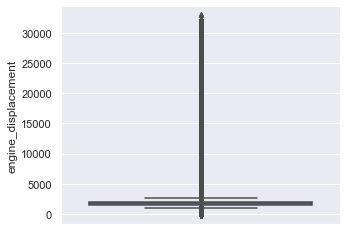

In [33]:
sns.set(rc={'figure.figsize':(5,4)})
sns.boxplot(y= df['engine_displacement'])

In [34]:
q1 = np.percentile(df["engine_displacement"],25)
q3 = np.percentile(df["engine_displacement"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(913.5, 2637.5)

__They are Lower and uppper bound of boxplot. Values beyond them are outliers.__

In [35]:
df[(df["engine_displacement"]>upper) | (df["engine_displacement"]<lower)].shape[0]

348650

348560 values are outliers in engine displacement column. You can winorize, drop, impute, logtransform data to handle outliers.

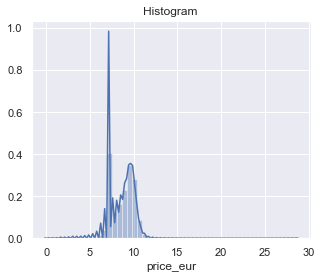

In [36]:
sns.distplot(np.log1p(df["price_eur"]))
plt.title("Histogram ")
plt.show()

# Encoding

In [37]:
df1 = df.copy()

In [38]:
df1.head()

,maker,mileage,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur
0,ford,151000.0,2000.0,103.0,man,5,7,10584.75
1,skoda,143476.0,2000.0,81.0,man,5,5,8882.31
2,bmw,97676.0,1995.0,85.0,man,5,5,12065.06
3,skoda,111970.0,1200.0,47.0,man,5,5,2960.77
4,skoda,128886.0,1200.0,47.0,man,5,5,2738.71


### Label encoding

If you have a large number of classes in a categorical feature, you can use label encoding. Label encoding assigns a unique label (integer number) to a specific class. 

In [39]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1['maker'] = lb_make.fit_transform(df1['maker'])
df1.head() #Results in appending a new column to df

,maker,mileage,engine_displacement,engine_power,transmission,door_count,seat_count,price_eur
0,11,151000.0,2000.0,103.0,man,5,7,10584.75
1,38,143476.0,2000.0,81.0,man,5,5,8882.31
2,4,97676.0,1995.0,85.0,man,5,5,12065.06
3,38,111970.0,1200.0,47.0,man,5,5,2960.77
4,38,128886.0,1200.0,47.0,man,5,5,2738.71


### One Hot Encoding

One-hot encoding uses binary values to represent classes. It creates a feature per category, and can quickly become inefficient as the number of classes in the categorical feature increases. We demonstrate how to use this below:

In [40]:
one_hot_encoded_data = pd.get_dummies(df1, columns=['maker','transmission'], prefix = ['maker','transmission'])

In [41]:
one_hot_encoded_data.shape

(3552912, 54)

In [42]:
one_hot_encoded_data.head(3)

,mileage,engine_displacement,engine_power,door_count,seat_count,price_eur,maker_0,maker_1,maker_2,maker_3,...,maker_38,maker_39,maker_40,maker_41,maker_42,maker_43,maker_44,maker_45,transmission_auto,transmission_man
0,151000.0,2000.0,103.0,5,7,10584.75,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,143476.0,2000.0,81.0,5,5,8882.31,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,97676.0,1995.0,85.0,5,5,12065.06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on. 

In the above data you can use `PCA` for dimension reduction.

# Feature scaling/Normalization of Features

In this section let's use number type column only.

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [44]:
number_type_data = df.select_dtypes(include=['number'])

In [45]:
number_type_data.head()

,mileage,engine_displacement,engine_power,door_count,seat_count,price_eur
0,151000.0,2000.0,103.0,5,7,10584.75
1,143476.0,2000.0,81.0,5,5,8882.31
2,97676.0,1995.0,85.0,5,5,12065.06
3,111970.0,1200.0,47.0,5,5,2960.77
4,128886.0,1200.0,47.0,5,5,2738.71


In [46]:
X = df[['mileage','engine_displacement','engine_power', 'door_count', 'seat_count']]

In [47]:
y_full = df[['price_eur']]

In [48]:
StandardScaler().fit_transform(X) # Data after standard scaling

array([[ 1.17699245e-01,  4.26954145e-03,  1.43013019e-01,
         1.16743970e+00,  2.14665681e+00],
       [ 9.45084555e-02,  4.26954145e-03, -3.42582964e-01,
         1.16743970e+00,  8.56357199e-02],
       [-4.66582310e-02,  1.42569713e-03, -2.54292785e-01,
         1.16743970e+00,  8.56357199e-02],
       ...,
       [ 3.61196368e-01, -5.26073450e-02,  7.67953850e-02,
        -4.38120579e-02,  8.56357199e-02],
       [-8.13673589e-02, -1.10621769e-01, -2.32220241e-01,
        -4.38120579e-02,  8.56357199e-02],
       [-8.13673589e-02, -1.10621769e-01, -2.32220241e-01,
        -4.38120579e-02,  8.56357199e-02]])

In [49]:
MinMaxScaler().fit_transform(X) #Data after min-max scaling

array([[0.0151    , 0.06103702, 0.04561717, 0.06493506, 0.01353965],
       [0.0143476 , 0.06103702, 0.03577818, 0.06493506, 0.00967118],
       [0.0097676 , 0.06088443, 0.03756708, 0.06493506, 0.00967118],
       ...,
       [0.023     , 0.05798517, 0.04427549, 0.05194805, 0.00967118],
       [0.0086415 , 0.05487228, 0.03801431, 0.05194805, 0.00967118],
       [0.0086415 , 0.05487228, 0.03801431, 0.05194805, 0.00967118]])

In [50]:
MaxAbsScaler().fit_transform(X) # Data after max-abs scaling

array([[0.0151    , 0.06103702, 0.04604381, 0.06493506, 0.01353965],
       [0.0143476 , 0.06103702, 0.03620921, 0.06493506, 0.00967118],
       [0.0097676 , 0.06088443, 0.03799732, 0.06493506, 0.00967118],
       ...,
       [0.023     , 0.05798517, 0.04470273, 0.05194805, 0.00967118],
       [0.0086415 , 0.05487228, 0.03844435, 0.05194805, 0.00967118],
       [0.0086415 , 0.05487228, 0.03844435, 0.05194805, 0.00967118]])

In [51]:
RobustScaler(quantile_range=(25, 75)).fit_transform(X) #Data after robust scaling

array([[ 0.51142156,  0.46867749,  0.47222222,  1.        ,  2.        ],
       [ 0.45184216,  0.46867749, -0.13888889,  1.        ,  0.        ],
       [ 0.08917114,  0.45707657, -0.02777778,  1.        ,  0.        ],
       ...,
       [ 1.13698947,  0.23665893,  0.38888889,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [52]:
PowerTransformer(method='yeo-johnson').fit_transform(X) #Data after power transformation (Yeo-Johnson)

array([[ 0.67983807,  0.32724965,  0.4145579 ,  1.19479851,  2.39741064],
       [ 0.637516  ,  0.32724965, -0.21371878,  1.19479851,  0.12451887],
       [ 0.33900375,  0.32036725, -0.08517045,  1.19479851,  0.12451887],
       ...,
       [ 1.05392795,  0.18553007,  0.3389445 , -0.06960123,  0.12451887],
       [ 0.25087755,  0.03144928, -0.05417033, -0.06960123,  0.12451887],
       [ 0.25087755,  0.03144928, -0.05417033, -0.06960123,  0.12451887]])

In [53]:
QuantileTransformer(output_distribution='normal').fit_transform(X) #Data after quantile transformation (gaussian pdf)

array([[ 6.99108088e-01,  9.59439593e-01,  5.40882478e-01,
         1.14731550e+00,  2.06377516e+00],
       [ 6.18532447e-01,  9.59439593e-01, -3.60171724e-01,
         1.14731550e+00,  8.28963782e-02],
       [ 2.31251293e-01,  7.39737219e-01, -2.38089328e-01,
         1.14731550e+00,  8.28963782e-02],
       ...,
       [ 1.47526936e+00,  3.89783431e-01,  4.39001209e-01,
        -1.61281273e-01,  8.28963782e-02],
       [ 6.27288467e-03,  3.76371500e-03,  1.25456904e-03,
        -1.61281273e-01,  8.28963782e-02],
       [ 6.27288467e-03,  3.76371500e-03,  1.25456904e-03,
        -1.61281273e-01,  8.28963782e-02]])

In [54]:
y = minmax_scale(y_full)

In [55]:
y

array([[3.91135514e-09],
       [3.28225453e-09],
       [4.45837231e-09],
       ...,
       [4.78650649e-10],
       [4.78650649e-10],
       [4.78650649e-10]])

# END